In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

In [2]:
import quandl
quandl.ApiConfig.api_key = 'zbUxxzuDxrACyfheY6o9'

In [3]:
stocks = ['MSFT', 'AMD', 'AMZN', 'KO','MCD','MO','NKE','PFE','WMT'] #SPOT, FB, TSLA
benchmarks = ['SPY', 'SHV'] 
data = {} 
for s in stocks + benchmarks:
    data[s] = quandl.get("EOD/"+s)

In [4]:
prc = pd.DataFrame() 

for s in stocks + benchmarks:
    tmp = data[s][['Adj_Close']] 
    tmp.columns = [s]
    prc = pd.concat([prc, tmp], axis=1)
    prc = prc[prc.index.weekday < 5] 

In [5]:
prc = prc.dropna()

In [6]:
portfolio = prc[['MSFT', 'AMD', 'AMZN', 'KO','MCD','MO','NKE','PFE','WMT']]
portfolio

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT
Date,,,,,,,,,
2007-01-11,22.563739,20.18,37.40,15.506434,28.991233,9.010811,10.322439,13.740474,34.068079
2007-01-12,22.938576,18.26,38.20,15.445987,28.802344,8.912035,10.299726,13.833947,34.340051
2007-01-16,22.901828,18.13,38.66,15.430079,29.030314,8.999724,10.321407,13.901455,34.576237
2007-01-17,22.857729,18.20,37.88,15.461894,29.219203,8.927154,10.305920,13.963770,34.497508
2007-01-18,22.784232,17.92,36.98,15.382357,29.043341,8.864663,10.290434,14.109172,34.633494
...,...,...,...,...,...,...,...,...,...
2021-09-17,299.870000,103.88,3462.52,54.440000,242.490000,48.610000,156.420000,43.890000,144.730000
2021-09-20,294.300000,101.55,3355.73,54.060000,239.090000,48.140000,154.250000,44.200000,142.740000
2021-09-21,294.800000,102.82,3343.63,54.050000,240.500000,48.030000,155.020000,43.920000,143.020000


In [7]:
 portfolio = prc[['MSFT', 'AMD', 'AMZN', 'KO','MCD','MO','NKE','PFE','WMT']].pct_change()
portfolio

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT
Date,,,,,,,,,
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,0.016612,-0.095144,0.021390,-0.003898,-0.006515,-0.010962,-0.002200,0.006803,0.007983
2007-01-16,-0.001602,-0.007119,0.012042,-0.001030,0.007915,0.009839,0.002105,0.004880,0.006878
2007-01-17,-0.001926,0.003861,-0.020176,0.002062,0.006507,-0.008064,-0.001500,0.004483,-0.002277
2007-01-18,-0.003215,-0.015385,-0.023759,-0.005144,-0.006019,-0.007000,-0.001503,0.010413,0.003942
...,...,...,...,...,...,...,...,...,...
2021-09-17,-0.017528,-0.022030,-0.007373,-0.016441,-0.002960,-0.003689,-0.007487,-0.013043,-0.002069
2021-09-20,-0.018575,-0.022430,-0.030842,-0.006980,-0.014021,-0.009669,-0.013873,0.007063,-0.013750
2021-09-21,0.001699,0.012506,-0.003606,-0.000185,0.005897,-0.002285,0.004992,-0.006335,0.001962


In [8]:
portfolio_data = 1 +  portfolio
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT
Date,,,,,,,,,
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983
2007-01-16,0.998398,0.992881,1.012042,0.998970,1.007915,1.009839,1.002105,1.004880,1.006878
2007-01-17,0.998074,1.003861,0.979824,1.002062,1.006507,0.991936,0.998500,1.004483,0.997723
2007-01-18,0.996785,0.984615,0.976241,0.994856,0.993981,0.993000,0.998497,1.010413,1.003942
...,...,...,...,...,...,...,...,...,...
2021-09-17,0.982472,0.977970,0.992627,0.983559,0.997040,0.996311,0.992513,0.986957,0.997931
2021-09-20,0.981425,0.977570,0.969158,0.993020,0.985979,0.990331,0.986127,1.007063,0.986250
2021-09-21,1.001699,1.012506,0.996394,0.999815,1.005897,0.997715,1.004992,0.993665,1.001962


In [9]:
portfolio_data.loc[pd.to_datetime("2007-01-11")] = 1 
portfolio_data = portfolio_data.sort_index() 
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT
Date,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983
2007-01-16,0.998398,0.992881,1.012042,0.998970,1.007915,1.009839,1.002105,1.004880,1.006878
2007-01-17,0.998074,1.003861,0.979824,1.002062,1.006507,0.991936,0.998500,1.004483,0.997723
2007-01-18,0.996785,0.984615,0.976241,0.994856,0.993981,0.993000,0.998497,1.010413,1.003942
...,...,...,...,...,...,...,...,...,...
2021-09-17,0.982472,0.977970,0.992627,0.983559,0.997040,0.996311,0.992513,0.986957,0.997931
2021-09-20,0.981425,0.977570,0.969158,0.993020,0.985979,0.990331,0.986127,1.007063,0.986250
2021-09-21,1.001699,1.012506,0.996394,0.999815,1.005897,0.997715,1.004992,0.993665,1.001962


In [10]:
portfolio_data = portfolio_data.cumprod() 
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT
Date,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983
2007-01-16,1.014984,0.898414,1.033690,0.995076,1.001348,0.998770,0.999900,1.011716,1.014916
2007-01-17,1.013029,0.901883,1.012834,0.997128,1.007863,0.990716,0.998400,1.016251,1.012605
2007-01-18,1.009772,0.888008,0.988770,0.991998,1.001797,0.983781,0.996899,1.026833,1.016597
...,...,...,...,...,...,...,...,...,...
2021-09-17,13.289907,5.147671,92.580749,3.510801,8.364253,5.394631,15.153395,3.194213,4.248258
2021-09-20,13.043051,5.032210,89.725401,3.486295,8.246976,5.342471,14.943173,3.216774,4.189846
2021-09-21,13.065211,5.095144,89.401872,3.485650,8.295611,5.330264,15.017768,3.196396,4.198065


In [11]:
portfolio_data['portfolio_value'] = portfolio_data.sum(axis=1) 
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT,portfolio_value
Date,,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983,8.934069
2007-01-16,1.014984,0.898414,1.033690,0.995076,1.001348,0.998770,0.999900,1.011716,1.014916,8.968813
2007-01-17,1.013029,0.901883,1.012834,0.997128,1.007863,0.990716,0.998400,1.016251,1.012605,8.950709
2007-01-18,1.009772,0.888008,0.988770,0.991998,1.001797,0.983781,0.996899,1.026833,1.016597,8.904455
...,...,...,...,...,...,...,...,...,...,...
2021-09-17,13.289907,5.147671,92.580749,3.510801,8.364253,5.394631,15.153395,3.194213,4.248258,150.883877
2021-09-20,13.043051,5.032210,89.725401,3.486295,8.246976,5.342471,14.943173,3.216774,4.189846,147.226197
2021-09-21,13.065211,5.095144,89.401872,3.485650,8.295611,5.330264,15.017768,3.196396,4.198065,147.085979


In [12]:
portfolio_data['portfolio_return'] = portfolio_data['portfolio_value'].pct_change()
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT,portfolio_value,portfolio_return
Date,,,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,NaN
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983,8.934069,-0.007326
2007-01-16,1.014984,0.898414,1.033690,0.995076,1.001348,0.998770,0.999900,1.011716,1.014916,8.968813,0.003889
2007-01-17,1.013029,0.901883,1.012834,0.997128,1.007863,0.990716,0.998400,1.016251,1.012605,8.950709,-0.002019
2007-01-18,1.009772,0.888008,0.988770,0.991998,1.001797,0.983781,0.996899,1.026833,1.016597,8.904455,-0.005168
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17,13.289907,5.147671,92.580749,3.510801,8.364253,5.394631,15.153395,3.194213,4.248258,150.883877,-0.008605
2021-09-20,13.043051,5.032210,89.725401,3.486295,8.246976,5.342471,14.943173,3.216774,4.189846,147.226197,-0.024242
2021-09-21,13.065211,5.095144,89.401872,3.485650,8.295611,5.330264,15.017768,3.196396,4.198065,147.085979,-0.000952


In [13]:
portfolio_data['lag_portfolio_return'] = portfolio_data['portfolio_return'].shift()
portfolio_data

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT,portfolio_value,portfolio_return,lag_portfolio_return
Date,,,,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,NaN,NaN
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983,8.934069,-0.007326,NaN
2007-01-16,1.014984,0.898414,1.033690,0.995076,1.001348,0.998770,0.999900,1.011716,1.014916,8.968813,0.003889,-0.007326
2007-01-17,1.013029,0.901883,1.012834,0.997128,1.007863,0.990716,0.998400,1.016251,1.012605,8.950709,-0.002019,0.003889
2007-01-18,1.009772,0.888008,0.988770,0.991998,1.001797,0.983781,0.996899,1.026833,1.016597,8.904455,-0.005168,-0.002019
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17,13.289907,5.147671,92.580749,3.510801,8.364253,5.394631,15.153395,3.194213,4.248258,150.883877,-0.008605,0.002222
2021-09-20,13.043051,5.032210,89.725401,3.486295,8.246976,5.342471,14.943173,3.216774,4.189846,147.226197,-0.024242,-0.008605
2021-09-21,13.065211,5.095144,89.401872,3.485650,8.295611,5.330264,15.017768,3.196396,4.198065,147.085979,-0.000952,-0.024242


In [14]:
SPY = quandl.get("EOD/SPY")['Adj_Close'].pct_change()
SHV = quandl.get("EOD/SHV")['Adj_Close'].pct_change()

In [15]:
portfolio_data['SHV'] = SHV
portfolio_data['SPY'] = SPY
portfolio_data['EXMKT'] = portfolio_data['SPY']-portfolio_data['SHV']
portfolio_data.head()

,MSFT,AMD,AMZN,KO,MCD,MO,NKE,PFE,WMT,portfolio_value,portfolio_return,lag_portfolio_return,SHV,SPY,EXMKT
Date,,,,,,,,,,,,,,,
2007-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,NaN,NaN,NaN,0.004380,NaN
2007-01-12,1.016612,0.904856,1.021390,0.996102,0.993485,0.989038,0.997800,1.006803,1.007983,8.934069,-0.007326,NaN,0.000552,0.007597,0.007045
2007-01-16,1.014984,0.898414,1.033690,0.995076,1.001348,0.998770,0.999900,1.011716,1.014916,8.968813,0.003889,-0.007326,-0.000184,-0.001955,-0.001771
2007-01-17,1.013029,0.901883,1.012834,0.997128,1.007863,0.990716,0.998400,1.016251,1.012605,8.950709,-0.002019,0.003889,0.000552,0.000420,-0.000132
2007-01-18,1.009772,0.888008,0.988770,0.991998,1.001797,0.983781,0.996899,1.026833,1.016597,8.904455,-0.005168,-0.002019,-0.000092,-0.003356,-0.003264


In [16]:
PD = portfolio_data.dropna()

In [17]:
PD['constant'] = 1

<ipython-input-17-17f74caf2368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD['constant'] = 1


In [18]:
import statsmodels.api as sm

In [19]:
reg = sm.OLS(PD['portfolio_return'], PD[['constant','lag_portfolio_return','EXMKT']]).fit()

In [20]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       portfolio_return   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3363.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:21:05   Log-Likelihood:                 12680.
No. Observations:                3700   AIC:                        -2.535e+04
Df Residuals:                    3697   BIC:                        -2.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                 0.0005      0.000      3.885      0.000       0.000       0.001
lag_portfolio_return    -0.0100      0.010     -1.016      0.310      -0.029       0.009
EXMKT                    0.8240      0.010     81.505      0.000       0.804       0.844
==============================================================================
Omnibus:                      757.823   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10079.373
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                      11.000   Cond. No.                         81.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXMKT', ylabel='portfolio_return'>

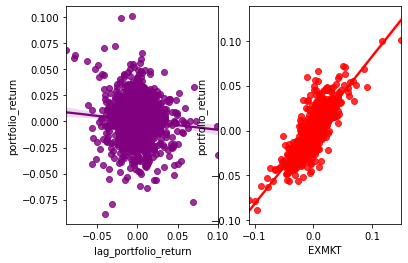

In [31]:
plt.subplot(1, 2, 1)
sns.regplot('lag_portfolio_return', 'portfolio_return', PD, color='purple')
plt.subplot(1, 2, 2)
sns.regplot('EXMKT', 'portfolio_return', PD, color='red')


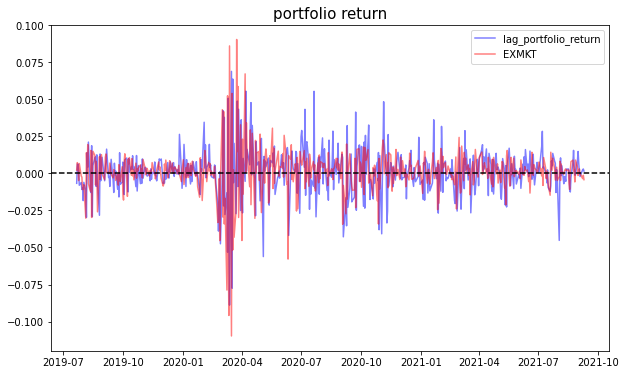

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('portfolio return', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(PD['lag_portfolio_return'][3150:3690],color='blue',alpha = 0.5)
ax.plot(PD['EXMKT'][3150:3690],color='red',alpha = 0.5)
ax.legend(['lag_portfolio_return','EXMKT'])
ax.axhline(0,0,1,color='black',linestyle='--')

# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

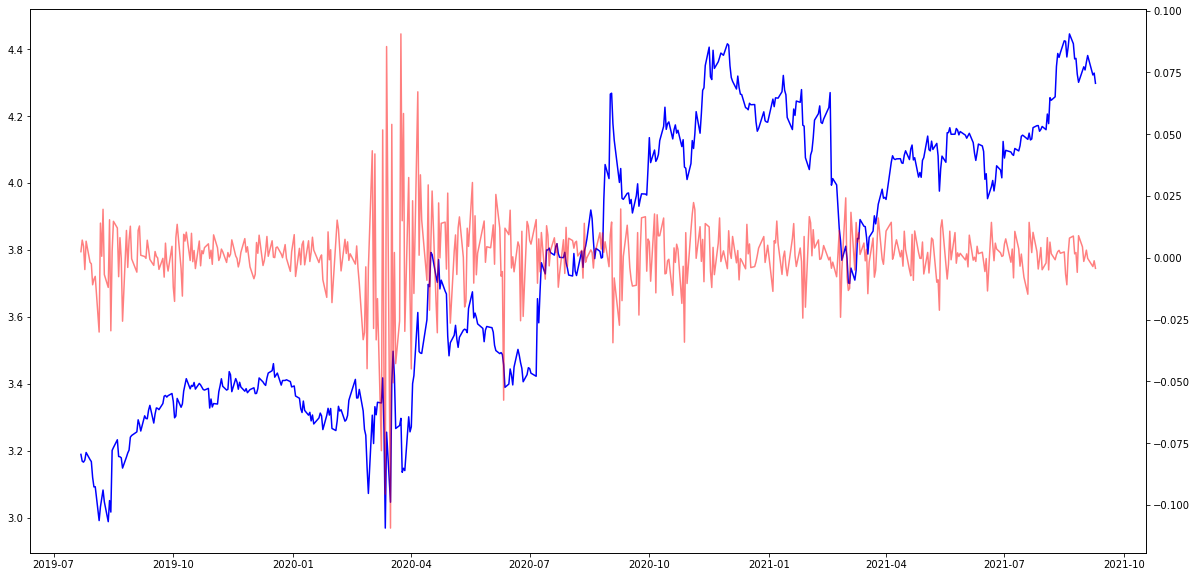

In [22]:

fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

# ax1.set_title(corp1+' article score'+' vs '+corp2+' earnings rate', fontsize=15)
# ax1.set_ylabel(corp1)
# ax2.set_ylabel(corp2)

# ax1.set_xlabel("Date Time")

ax1.plot(PD['WMT'][3150:3690],color='blue')
ax2.plot(PD['SPY'][3150:3690],color='red',alpha=0.5)

# ax1.legend([corp1+' article score'],loc='upper left')
# ax2.legend([corp2+' earnings rate'],loc='upper right')
plt.show()